# Spotify Classification Problem

With millions of users globally, Spotify is one of the digital music applications with a wide range of features that has become very popular over the years.One of the major trends in machine learning is the prediction of various attributes of the songs, including song title, time, the song's artist, etc. The idea is that, if we use classification analysis of machine learning, we can predict what genres of data are likely to dominate a set of data that has already been presented. 
As a part of the coursework, this document summarizes the steps we have followed like code, explanations, related graphs, and other related details.


## Required Libraries

- Pandas- This library contains a wide range of functions and methods to help you accelerate the process in which you analyze the data.
- Numpy - The numpy library provides all the functions you need to prepare and transform your data before using a machine learning algorithm.
- Matplotlib- The matplotlib a 2-D plotting library that helps in visualizing figures.
- Seaborn-The seaborn library provides a high-level interface for drawing attractive and informative statistical graphs.
- Scikit learn library-The scikit learn library creates various models and prepare and evaluate data or even create post-model analysis.

## Justification for the choices

Multiple logistic regression analysis was used for the classification analysis.
Putting this in place was done for primarily the reason that we felt it was important to use several independent variables such as title, artist, and popularity to be able to predict the top genre.


## Explanation of the various models tried.

In classification, the chosen model was able to work, and also test data was tested for prediction and it worked. However in classification, the use of a k-means clustering algorithm didn’t work due to the presence of different sizes of data that could not be able to cluster.

## Description of the solution

Importing the major libraries as well as the dependencies

In [1]:
# Importing pandas library
import pandas as pd
# Importing numpy library
import numpy as np
# Importing matplotlib library
import matplotlib.pyplot as plt
# Importing seaborn library
import seaborn as sns
# Importing scikit learn library
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error,r2_score,recall_score,precision_score,confusion_matrix

## Data Understanding

Understanding the data where we used most of the pandas library attributes so that we could be able to visualize the data and see the different trends of the data. Some of the codes that we employed include:

In [2]:
# loading the data
test_data = pd.read_csv("CS98XClassificationTest.csv")
train_data = pd.read_csv('CS98XClassificationTrain.csv')

In [3]:
# previewing the data
test_data

,Id,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,454,Pump It,The Black Eyed Peas,2005,154,93,65,-3,75,74,213,1,18,72
1,455,"Circle of Life - From ""The Lion King""/Soundtra...",Elton John,1994,161,39,30,-15,11,14,292,26,3,59
2,456,We Are The Champions - Remastered 2011,Queen,1977,64,46,27,-7,12,18,179,38,3,76
3,457,Insomnia - Radio Edit,Faithless,2010,127,92,71,-9,37,53,216,6,4,50
4,458,This Eve of Parting,John Hartford,2018,115,46,56,-12,21,34,153,18,3,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,563,Candy Shop,50 Cent,2005,125,57,61,-8,38,76,209,3,47,78
109,564,Dragostea Din Tei - Italian Version,O-Zone,2010,130,89,67,-6,10,80,215,4,3,44
110,565,Big Poppa - 2005 Remaster,The Notorious B.I.G.,1994,84,58,78,-7,14,76,253,43,27,74
111,566,YMCA - Original Version 1978,Village People,1978,127,97,72,-5,12,73,287,6,14,71


In [4]:
train_data

,Id,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top genre
0,1,My Happiness,Connie Francis,1996,107,31,45,-8,13,28,150,75,3,44,adult standards
1,2,Unchained Melody,The Teddy Bears,2011,114,44,53,-8,13,47,139,49,3,37,NaN
2,3,How Deep Is Your Love,Bee Gees,1979,105,36,63,-9,13,67,245,11,3,77,adult standards
3,4,Woman in Love,Barbra Streisand,1980,170,28,47,-16,13,33,232,25,3,67,adult standards
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,1973,121,47,56,-8,15,40,193,45,3,63,glam rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,449,But Not For Me,Ella Fitzgerald,1959,80,22,18,-17,10,16,214,92,4,45,adult standards
449,450,Surf City,Jan & Dean,2010,148,81,53,-13,23,96,147,50,3,50,brill building pop
450,451,Dilemma,Nelly,2002,168,55,73,-8,20,61,289,23,14,77,dance pop
451,452,It's Gonna Be Me,*NSYNC,2000,165,87,64,-5,6,88,191,5,8,62,boy band


In [5]:
# previewing first 5 records
train_data.head()

,Id,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top genre
0,1,My Happiness,Connie Francis,1996,107,31,45,-8,13,28,150,75,3,44,adult standards
1,2,Unchained Melody,The Teddy Bears,2011,114,44,53,-8,13,47,139,49,3,37,NaN
2,3,How Deep Is Your Love,Bee Gees,1979,105,36,63,-9,13,67,245,11,3,77,adult standards
3,4,Woman in Love,Barbra Streisand,1980,170,28,47,-16,13,33,232,25,3,67,adult standards
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,1973,121,47,56,-8,15,40,193,45,3,63,glam rock


In [6]:
# previewing first 5 records
test_data.head()

,Id,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,454,Pump It,The Black Eyed Peas,2005,154,93,65,-3,75,74,213,1,18,72
1,455,"Circle of Life - From ""The Lion King""/Soundtra...",Elton John,1994,161,39,30,-15,11,14,292,26,3,59
2,456,We Are The Champions - Remastered 2011,Queen,1977,64,46,27,-7,12,18,179,38,3,76
3,457,Insomnia - Radio Edit,Faithless,2010,127,92,71,-9,37,53,216,6,4,50
4,458,This Eve of Parting,John Hartford,2018,115,46,56,-12,21,34,153,18,3,44


In [7]:
# previewing last 5 records
train_data.tail()

,Id,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top genre
448,449,But Not For Me,Ella Fitzgerald,1959,80,22,18,-17,10,16,214,92,4,45,adult standards
449,450,Surf City,Jan & Dean,2010,148,81,53,-13,23,96,147,50,3,50,brill building pop
450,451,Dilemma,Nelly,2002,168,55,73,-8,20,61,289,23,14,77,dance pop
451,452,It's Gonna Be Me,*NSYNC,2000,165,87,64,-5,6,88,191,5,8,62,boy band
452,453,In The Army Now,Status Quo,2002,105,73,68,-8,14,94,281,11,2,59,album rock


In [8]:
# previewing last 5 records
test_data.tail()

,Id,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
108,563,Candy Shop,50 Cent,2005,125,57,61,-8,38,76,209,3,47,78
109,564,Dragostea Din Tei - Italian Version,O-Zone,2010,130,89,67,-6,10,80,215,4,3,44
110,565,Big Poppa - 2005 Remaster,The Notorious B.I.G.,1994,84,58,78,-7,14,76,253,43,27,74
111,566,YMCA - Original Version 1978,Village People,1978,127,97,72,-5,12,73,287,6,14,71
112,567,Livin' On A Prayer,Bon Jovi,1986,123,89,53,-4,29,80,249,8,3,83


In [9]:
# sampling data
train_data.sample()

,Id,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top genre
9,10,You Belong to My Heart,Timi Yuro,2013,108,39,46,-10,16,50,126,82,3,35,adult standards


In [10]:
# sampling data
test_data.sample()

,Id,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
11,465,Umbrella,Rihanna,2008,174,83,58,-5,4,57,276,1,13,80


In [11]:
# visualizing the columns of the data set
train_data.columns

Index(['Id', 'title', 'artist', 'year', 'bpm', 'nrgy', 'dnce', 'dB', 'live',
       'val', 'dur', 'acous', 'spch', 'pop', 'top genre'],
      dtype='object')

In [12]:
#visualizing the columns of the data set
test_data.columns

Index(['Id', 'title', 'artist', 'year', 'bpm', 'nrgy', 'dnce', 'dB', 'live',
       'val', 'dur', 'acous', 'spch', 'pop'],
      dtype='object')

Since the classification problem aims at targeting the song genre, thus the column "top genre" will be our target variable

<AxesSubplot:ylabel='top genre'>

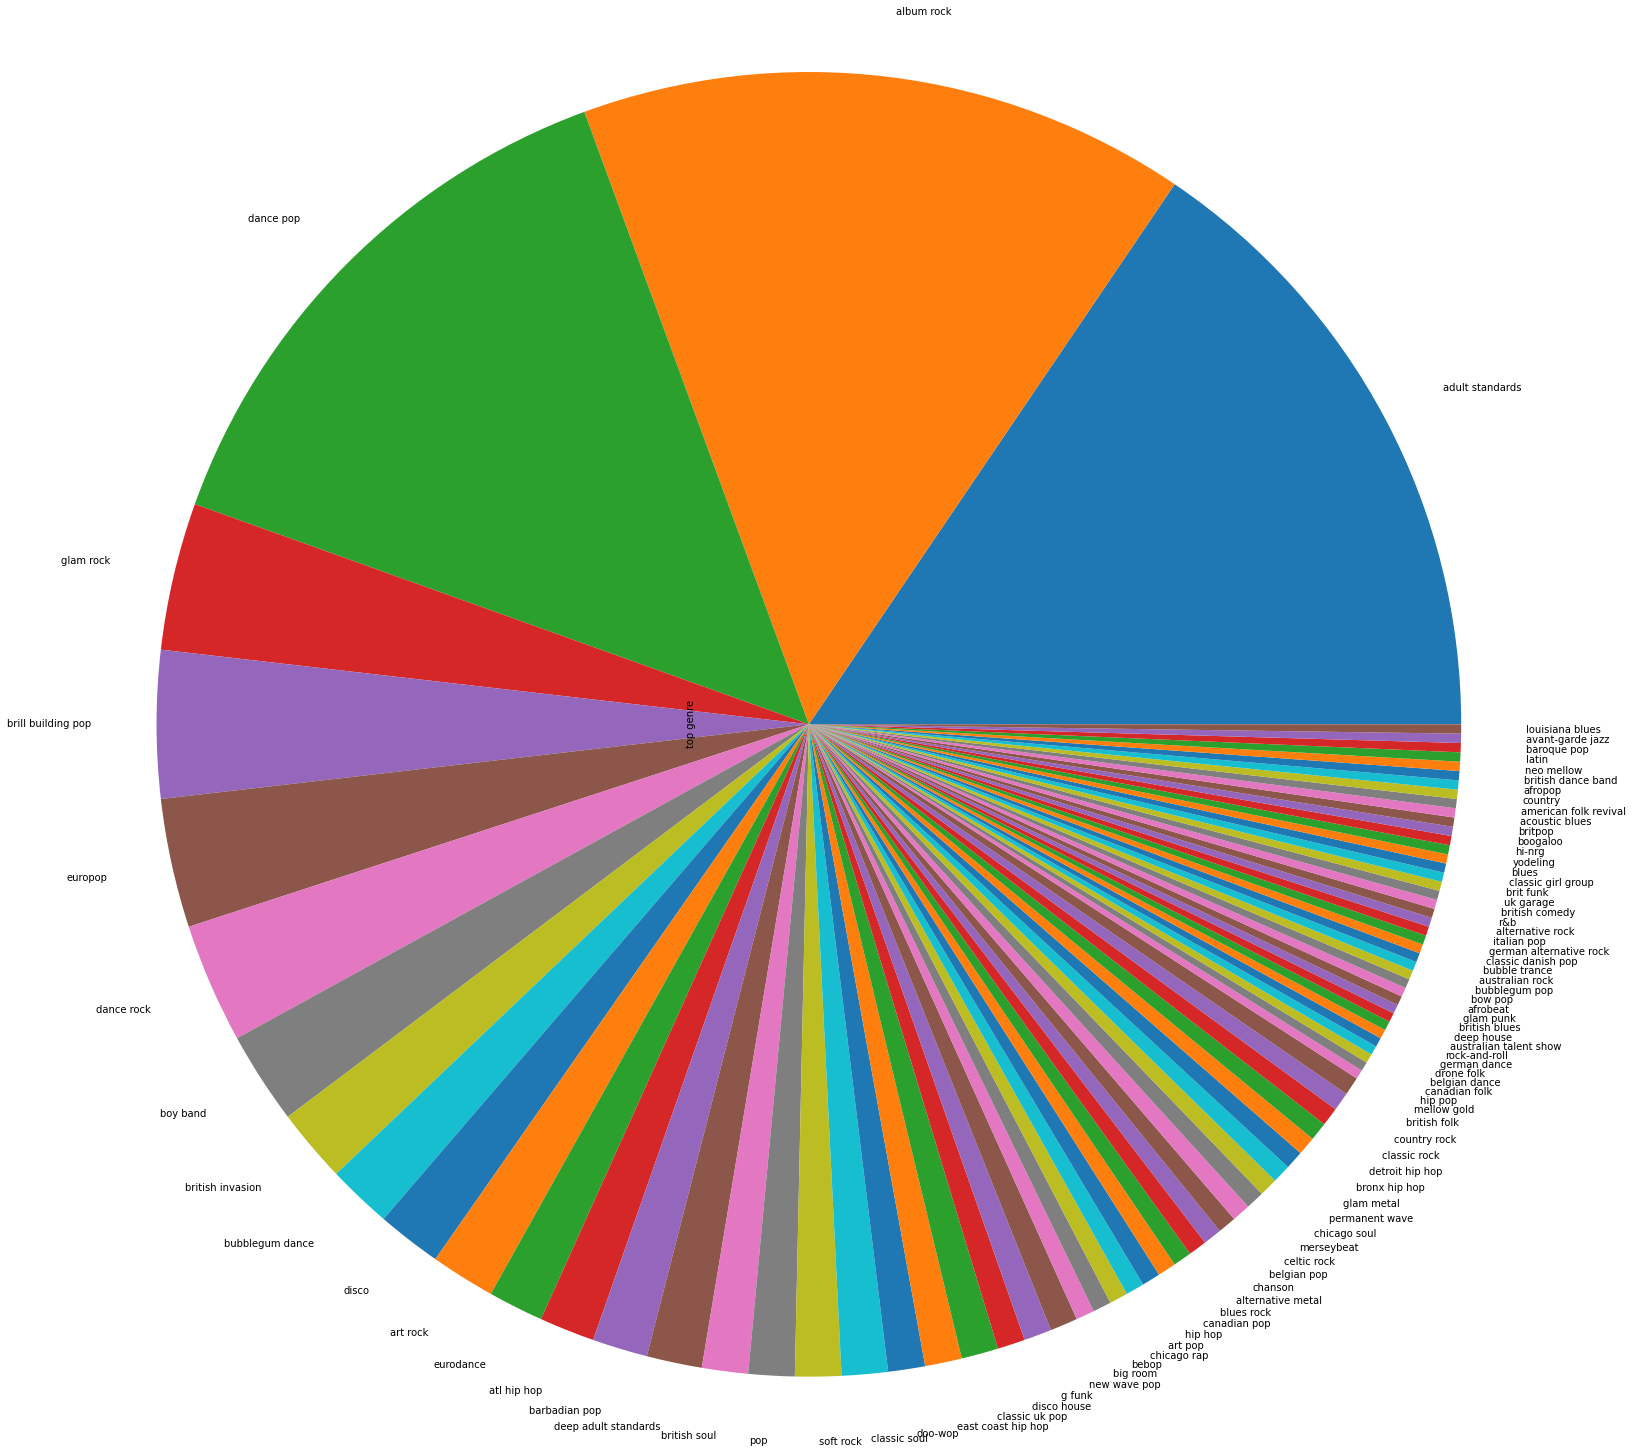

In [13]:
# previewing target variable
train_data['top genre'].value_counts().plot(kind='pie',radius=(7.5))

From the above it can be seen that the three top genres are "adult standards","album rock","dance pop".

In [14]:
# checking information about data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         453 non-null    int64 
 1   title      453 non-null    object
 2   artist     453 non-null    object
 3   year       453 non-null    int64 
 4   bpm        453 non-null    int64 
 5   nrgy       453 non-null    int64 
 6   dnce       453 non-null    int64 
 7   dB         453 non-null    int64 
 8   live       453 non-null    int64 
 9   val        453 non-null    int64 
 10  dur        453 non-null    int64 
 11  acous      453 non-null    int64 
 12  spch       453 non-null    int64 
 13  pop        453 non-null    int64 
 14  top genre  438 non-null    object
dtypes: int64(12), object(3)
memory usage: 53.2+ KB


In [15]:
# checking information about data
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      113 non-null    int64 
 1   title   113 non-null    object
 2   artist  113 non-null    object
 3   year    113 non-null    int64 
 4   bpm     113 non-null    int64 
 5   nrgy    113 non-null    int64 
 6   dnce    113 non-null    int64 
 7   dB      113 non-null    int64 
 8   live    113 non-null    int64 
 9   val     113 non-null    int64 
 10  dur     113 non-null    int64 
 11  acous   113 non-null    int64 
 12  spch    113 non-null    int64 
 13  pop     113 non-null    int64 
dtypes: int64(12), object(2)
memory usage: 12.5+ KB


In [16]:
# checking shape or number of record in the train data
train_data.shape

(453, 15)

In [17]:
# checking shape or number of record in the test data
test_data.shape

(113, 14)

In [18]:
# checking datatypes of train data
train_data.dtypes

Id            int64
title        object
artist       object
year          int64
bpm           int64
nrgy          int64
dnce          int64
dB            int64
live          int64
val           int64
dur           int64
acous         int64
spch          int64
pop           int64
top genre    object
dtype: object

In [19]:
#checking datatypes of test data
test_data.dtypes

Id         int64
title     object
artist    object
year       int64
bpm        int64
nrgy       int64
dnce       int64
dB         int64
live       int64
val        int64
dur        int64
acous      int64
spch       int64
pop        int64
dtype: object

## Data Preparation and Analysis

We prepared the data for modelling by investigating if there is missing values. We found that there is presence of missing values so we cleaned the missing  values by filling the null values with ‘NONE’. In addition we also checked for unique values and also outliers.

In [20]:
# checking missing data
train_data.isna().sum()

Id            0
title         0
artist        0
year          0
bpm           0
nrgy          0
dnce          0
dB            0
live          0
val           0
dur           0
acous         0
spch          0
pop           0
top genre    15
dtype: int64

In [21]:
# checking missing data
train_data.isna().sum()

Id            0
title         0
artist        0
year          0
bpm           0
nrgy          0
dnce          0
dB            0
live          0
val           0
dur           0
acous         0
spch          0
pop           0
top genre    15
dtype: int64

In [7]:
# treating missing values with none
train_data['top genre'].fillna('None',inplace=True)

In [23]:
# checking for missing values after cleaning
train_data.isna().sum()

Id           0
title        0
artist       0
year         0
bpm          0
nrgy         0
dnce         0
dB           0
live         0
val          0
dur          0
acous        0
spch         0
pop          0
top genre    0
dtype: int64

### There are no missing values

In [24]:
# checking duplicated values
train_data.duplicated().any()

False

In [25]:
# checking unique values
train_data.nunique()

Id           453
title        451
artist       345
year          64
bpm          107
nrgy          90
dnce          77
dB            21
live          58
val           94
dur          202
acous         95
spch          29
pop           59
top genre     87
dtype: int64

Outliers are data records that differ dramatically from all others, they distinguish themselves in one or more characteristics. In other words, an outlier is a value that escapes normality and can (and probably will) cause anomalies in the results obtained through algorithms and analytical systems. There, they always need some degrees of attention.


<AxesSubplot:>

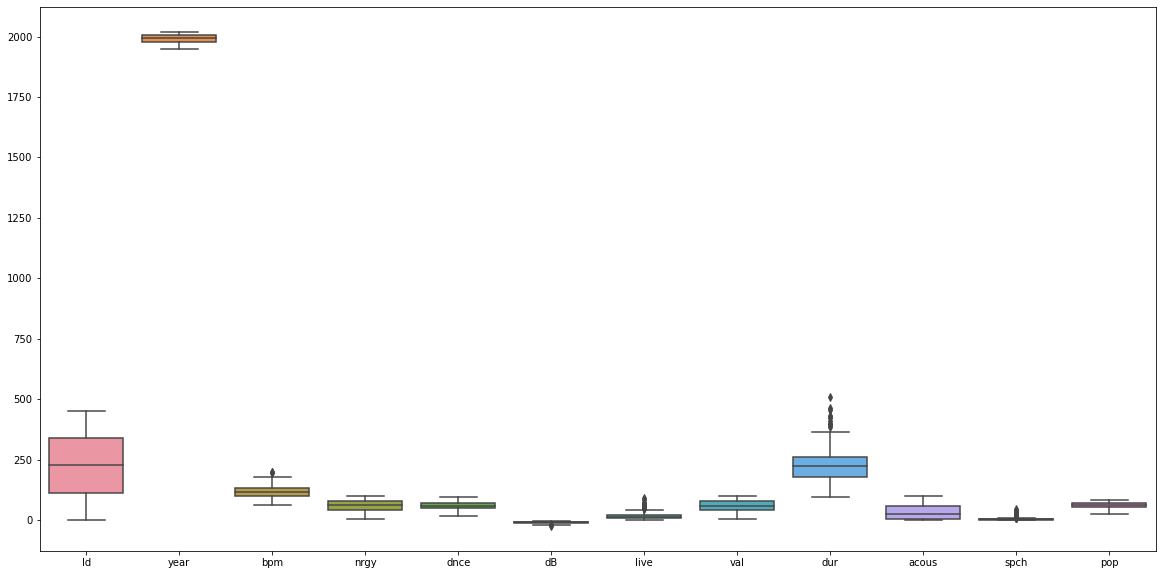

In [26]:
# checking outliers
plt.figure(figsize=(20,10))
sns.boxplot(data=train_data)

## Univariate Analysis

The univariate analysis part composes of assessing each data variable matrix as one by isolating it and emphasizing on it. In here we sought for the data description and also understanding the correlation between variables.

In [27]:
# checking summary statistics for numericals
train_data.describe()

,Id,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000
mean,227.000000,1991.443709,118.399558,60.070640,59.565121,-8.836645,17.757174,59.465784,226.278146,32.982340,5.660044,60.743929
std,130.914094,16.776103,25.238713,22.205284,15.484458,3.577187,13.830300,24.539868,63.770380,29.530015,5.550581,13.470083
min,1.000000,1948.000000,62.000000,7.000000,18.000000,-24.000000,2.000000,6.000000,98.000000,0.000000,2.000000,26.000000
25%,114.000000,1976.000000,100.000000,43.000000,49.000000,-11.000000,9.000000,42.000000,181.000000,7.000000,3.000000,53.000000
50%,227.000000,1994.000000,119.000000,63.000000,61.000000,-8.000000,13.000000,61.000000,223.000000,24.000000,4.000000,63.000000
75%,340.000000,2007.000000,133.000000,78.000000,70.000000,-6.000000,23.000000,80.000000,262.000000,58.000000,6.000000,71.000000
max,453.000000,2019.000000,199.000000,100.000000,96.000000,-1.000000,93.000000,99.000000,511.000000,100.000000,47.000000,84.000000


In [28]:
# checking summary statistics for numericals and non-numeric vales
train_data.describe(include='all')

,Id,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top genre
count,453.000000,453,453,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453
unique,NaN,451,345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87
top,NaN,Take Good Care Of My Baby - 1990 Remastered,Elton John,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,adult standards
freq,NaN,2,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68
mean,227.000000,NaN,NaN,1991.443709,118.399558,60.070640,59.565121,-8.836645,17.757174,59.465784,226.278146,32.982340,5.660044,60.743929,NaN
std,130.914094,NaN,NaN,16.776103,25.238713,22.205284,15.484458,3.577187,13.830300,24.539868,63.770380,29.530015,5.550581,13.470083,NaN
min,1.000000,NaN,NaN,1948.000000,62.000000,7.000000,18.000000,-24.000000,2.000000,6.000000,98.000000,0.000000,2.000000,26.000000,NaN
25%,114.000000,NaN,NaN,1976.000000,100.000000,43.000000,49.000000,-11.000000,9.000000,42.000000,181.000000,7.000000,3.000000,53.000000,NaN
50%,227.000000,NaN,NaN,1994.000000,119.000000,63.000000,61.000000,-8.000000,13.000000,61.000000,223.000000,24.000000,4.000000,63.000000,NaN
75%,340.000000,NaN,NaN,2007.000000,133.000000,78.000000,70.000000,-6.000000,23.000000,80.000000,262.000000,58.000000,6.000000,71.000000,NaN


<AxesSubplot:>

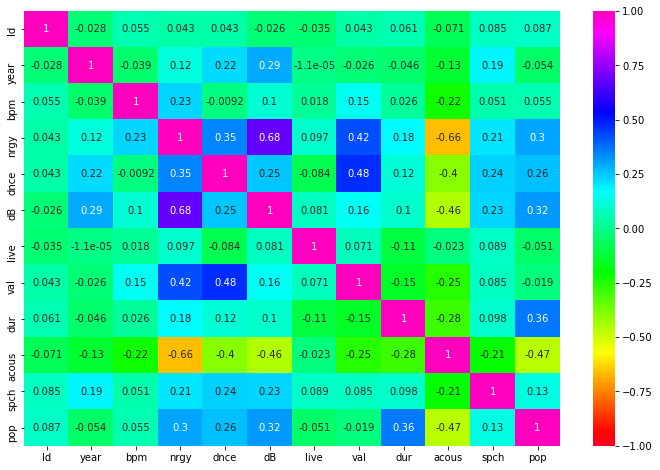

In [29]:
# performing correlation between different variables
corr=train_data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True,cmap='gist_rainbow',vmin=-1,vmax=1)

## Modeling

In classicfication, we started of by converting the string variables such as artist and title columns into numerical values that are easy for mathematical computations using the label encoder; a module found in scikit learn.

 LabelEncoder can be used to normalize labels. It can also be used to transform non-numerical labels (as long as they are hashable and comparable) to numerical labels

In [30]:
le = LabelEncoder()

In [31]:
# transforming the title column in the train_data set into numerical label
train_data['title'] = le.fit_transform(train_data.title)

In [32]:
train_data['title']

0      273
1      411
2      164
3      436
4      140
      ... 
448     58
449    374
450     85
451    208
452    201
Name: title, Length: 453, dtype: int32

In [33]:
# transforming the artist column in the train_data set into numerical label
train_data['artist'] = le.fit_transform(train_data.artist)
train_data.artist

0       56
1      306
2       20
3       19
4       94
      ... 
448     93
449    138
450    207
451      0
452    253
Name: artist, Length: 453, dtype: int32

Since the classification problem aims at targeting the song genre, thus the column "top genre" will be our target variable

In [34]:
# dropping the target variable in the training data set
x_train = train_data.drop(columns = ['top genre'])
# defining the target variable
y_train = train_data["top genre"]
y_train

0         adult standards
1                    None
2         adult standards
3         adult standards
4               glam rock
              ...        
448       adult standards
449    brill building pop
450             dance pop
451              boy band
452            album rock
Name: top genre, Length: 453, dtype: object

In [35]:
# converting the title column in test data into numerical values
le = LabelEncoder()

test_data['title'] = le.fit_transform(test_data['title'])
test_data['title']

0       66
1       17
2      102
3       50
4       97
      ... 
108     15
109     25
110     10
111    106
112     56
Name: title, Length: 113, dtype: int32

In [36]:
# converting the artist column in test data into numerical values
test_data['artist'] = le.fit_transform(test_data['artist'])
test_data['artist']

0      82
1      34
2      68
3      38
4      47
       ..
108     1
109    61
110    90
111    96
112    13
Name: artist, Length: 113, dtype: int32

In [37]:
#predictor variables
x=test_data
#target variable
y=train_data["top genre"]


In [38]:
x

,Id,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,454,66,82,2005,154,93,65,-3,75,74,213,1,18,72
1,455,17,34,1994,161,39,30,-15,11,14,292,26,3,59
2,456,102,68,1977,64,46,27,-7,12,18,179,38,3,76
3,457,50,38,2010,127,92,71,-9,37,53,216,6,4,50
4,458,97,47,2018,115,46,56,-12,21,34,153,18,3,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,563,15,1,2005,125,57,61,-8,38,76,209,3,47,78
109,564,25,61,2010,130,89,67,-6,10,80,215,4,3,44
110,565,10,90,1994,84,58,78,-7,14,76,253,43,27,74
111,566,106,96,1978,127,97,72,-5,12,73,287,6,14,71


## Logistic Regression or Binary Classification

We then trained the train data and fitted it into a logistic regression model; log = LogisticRegression().The model was able to function as it was able to predict the genre of songs. To predict the songs we used the prediction=log.predict(x) where x is the test data so that we could make predicitons using the test data.

In [39]:
log=LogisticRegression()
# fitting model
log.fit(x_train,y_train)
# predictions using the x which is the test data set
prediction=log.predict(x)



C:\Users\user\3DObjects\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The predictions made

In [40]:
# The predicted genres
prediction

array(['album rock', 'album rock', 'adult standards', 'dance pop',
       'adult standards', 'europop', 'adult standards',
       'brill building pop', 'adult standards', 'boy band',
       'adult standards', 'album rock', 'adult standards', 'album rock',
       'boy band', 'album rock', 'album rock', 'boy band', 'boy band',
       'dance pop', 'adult standards', 'louisiana blues',
       'adult standards', 'adult standards', 'adult standards',
       'boy band', 'album rock', 'louisiana blues', 'brill building pop',
       'dance pop', 'album rock', 'brill building pop', 'dance pop',
       'dance pop', 'dance pop', 'dance pop', 'louisiana blues',
       'adult standards', 'europop', 'europop', 'album rock',
       'avant-garde jazz', 'album rock', 'brill building pop',
       'album rock', 'album rock', 'album rock', 'east coast hip hop',
       'louisiana blues', 'boy band', 'louisiana blues', 'europop',
       'boy band', 'adult standards', 'adult standards',
       'louisiana blue

In [41]:
# Making the predictions into a dataframe
Prediction_dataframe = pd.DataFrame(prediction)

In [42]:
Prediction_dataframe

,0
0,album rock
1,album rock
2,adult standards
3,dance pop
4,adult standards
...,...
108,louisiana blues
109,louisiana blues
110,alternative rock
111,g funk


In [43]:
test_data

,Id,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,454,66,82,2005,154,93,65,-3,75,74,213,1,18,72
1,455,17,34,1994,161,39,30,-15,11,14,292,26,3,59
2,456,102,68,1977,64,46,27,-7,12,18,179,38,3,76
3,457,50,38,2010,127,92,71,-9,37,53,216,6,4,50
4,458,97,47,2018,115,46,56,-12,21,34,153,18,3,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,563,15,1,2005,125,57,61,-8,38,76,209,3,47,78
109,564,25,61,2010,130,89,67,-6,10,80,215,4,3,44
110,565,10,90,1994,84,58,78,-7,14,76,253,43,27,74
111,566,106,96,1978,127,97,72,-5,12,73,287,6,14,71


In [44]:
# Adding the predicted values to the test_data set
test_data['Prediction_dataframe'] = Prediction_dataframe

In [45]:
test_data

,Id,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,Prediction_dataframe
0,454,66,82,2005,154,93,65,-3,75,74,213,1,18,72,album rock
1,455,17,34,1994,161,39,30,-15,11,14,292,26,3,59,album rock
2,456,102,68,1977,64,46,27,-7,12,18,179,38,3,76,adult standards
3,457,50,38,2010,127,92,71,-9,37,53,216,6,4,50,dance pop
4,458,97,47,2018,115,46,56,-12,21,34,153,18,3,44,adult standards
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,563,15,1,2005,125,57,61,-8,38,76,209,3,47,78,louisiana blues
109,564,25,61,2010,130,89,67,-6,10,80,215,4,3,44,louisiana blues
110,565,10,90,1994,84,58,78,-7,14,76,253,43,27,74,alternative rock
111,566,106,96,1978,127,97,72,-5,12,73,287,6,14,71,g funk


In [46]:
original_test_data = pd.read_csv("CS98XClassificationTest.csv")
original_test_data

,Id,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,454,Pump It,The Black Eyed Peas,2005,154,93,65,-3,75,74,213,1,18,72
1,455,"Circle of Life - From ""The Lion King""/Soundtra...",Elton John,1994,161,39,30,-15,11,14,292,26,3,59
2,456,We Are The Champions - Remastered 2011,Queen,1977,64,46,27,-7,12,18,179,38,3,76
3,457,Insomnia - Radio Edit,Faithless,2010,127,92,71,-9,37,53,216,6,4,50
4,458,This Eve of Parting,John Hartford,2018,115,46,56,-12,21,34,153,18,3,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,563,Candy Shop,50 Cent,2005,125,57,61,-8,38,76,209,3,47,78
109,564,Dragostea Din Tei - Italian Version,O-Zone,2010,130,89,67,-6,10,80,215,4,3,44
110,565,Big Poppa - 2005 Remaster,The Notorious B.I.G.,1994,84,58,78,-7,14,76,253,43,27,74
111,566,YMCA - Original Version 1978,Village People,1978,127,97,72,-5,12,73,287,6,14,71


We then appended the predicted data into the original test dataframe

In [47]:
# Adding the predicted values to the original test_data set
original_test_data['Prediction_dataframe'] = Prediction_dataframe

In [48]:
original_test_data

,Id,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,Prediction_dataframe
0,454,Pump It,The Black Eyed Peas,2005,154,93,65,-3,75,74,213,1,18,72,album rock
1,455,"Circle of Life - From ""The Lion King""/Soundtra...",Elton John,1994,161,39,30,-15,11,14,292,26,3,59,album rock
2,456,We Are The Champions - Remastered 2011,Queen,1977,64,46,27,-7,12,18,179,38,3,76,adult standards
3,457,Insomnia - Radio Edit,Faithless,2010,127,92,71,-9,37,53,216,6,4,50,dance pop
4,458,This Eve of Parting,John Hartford,2018,115,46,56,-12,21,34,153,18,3,44,adult standards
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,563,Candy Shop,50 Cent,2005,125,57,61,-8,38,76,209,3,47,78,louisiana blues
109,564,Dragostea Din Tei - Italian Version,O-Zone,2010,130,89,67,-6,10,80,215,4,3,44,louisiana blues
110,565,Big Poppa - 2005 Remaster,The Notorious B.I.G.,1994,84,58,78,-7,14,76,253,43,27,74,alternative rock
111,566,YMCA - Original Version 1978,Village People,1978,127,97,72,-5,12,73,287,6,14,71,g funk


## Conclusion

The above data set is the comparison between the test values and the predcited values. For the classification analysis, the model was able to predict the top genre songs where the top genres that were mostly predicted were adult standards, Louisiana blues and album rock.